In [9]:
#importing libraries
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
plt.imshow??

In [11]:
#importing tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [9]:
#Avoid out of memory error by setting the GPU memory consumption GROWTH
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:tf.config.experimental.set_memory_growth(gpu,True)

In [12]:
#setup paths
POS_PATH=os.path.join('data','positive')
NEG_PATH=os.path.join('data','negative')
ANC_PATH=os.path.join('data','anchor')

In [13]:
POS_PATH

'data\\positive'

In [13]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

In [15]:
 os.getcwd()

'C:\\Users\\user'

In [16]:
# Uncompress Tar GZ LAbelled Faces in the wild Dataset
!tar -xf lfw.tgz

In [25]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw',directory)):
        EX_PATH=os.path.join('lfw',directory,file)
        NEW_PATH=os.path.join(NEG_PATH,file)
        os.replace(EX_PATH,NEW_PATH)

In [22]:
for diretory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw',directory)):
        print(os.path.join('lfw',directory,file))
        print(os.path.join(NEG_PATH,file))

lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eckhart_0001.jpg
lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
data\negative\Aaron_Eck

In [85]:
#we want to control the images we take..
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame=cap.read()
    #cut your frame to 250 by 250 pixels
    frame=frame[70:70+250,200:200+250,:]
    #anchor images
    if cv2.waitKey(1) & 0xFF == ord('a'):
        imgname=os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
        #positives
    if cv2.waitKey(1) & 0xFF == ord('p'):
        imgname=os.path.join(POS_PATH,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
    cv2.imshow('Image Collection',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        #Release the wencam
cap.release()
#To close the image from the frame
cv2.destroyAllWindows()

In [33]:
cv2.waitKey??

In [59]:
frame

array([[[169, 168, 161],
        [163, 166, 158],
        [160, 167, 157],
        ...,
        [165, 177, 170],
        [170, 180, 175],
        [171, 181, 176]],

       [[167, 171, 163],
        [163, 169, 160],
        [163, 170, 160],
        ...,
        [163, 177, 169],
        [168, 180, 175],
        [168, 180, 175]],

       [[168, 174, 167],
        [163, 170, 162],
        [163, 170, 162],
        ...,
        [163, 179, 170],
        [164, 180, 172],
        [164, 180, 172]],

       ...,

       [[100, 118, 110],
        [100, 120, 111],
        [100, 120, 111],
        ...,
        [ 72,  58,  23],
        [ 74,  59,  24],
        [ 75,  60,  25]],

       [[100, 120, 111],
        [ 98, 119, 110],
        [ 98, 119, 110],
        ...,
        [ 73,  58,  21],
        [ 74,  58,  21],
        [ 75,  58,  21]],

       [[ 96, 119, 110],
        [ 95, 119, 110],
        [ 93, 118, 109],
        ...,
        [ 69,  55,  17],
        [ 70,  56,  18],
        [ 71,  57,  20]]

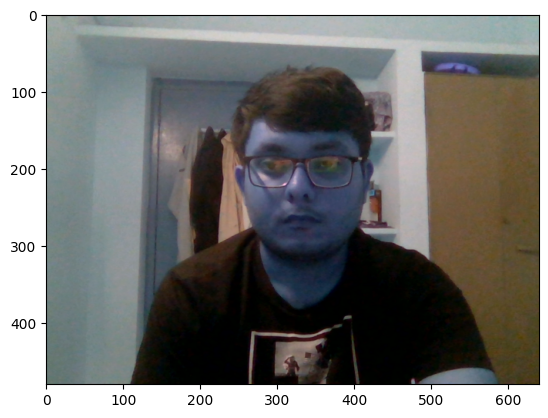

In [60]:
plt.imshow(frame)

In [50]:
frame.shape

(480, 640, 3)

In [61]:
frame[:250,:250,:].shape

(250, 250, 3)

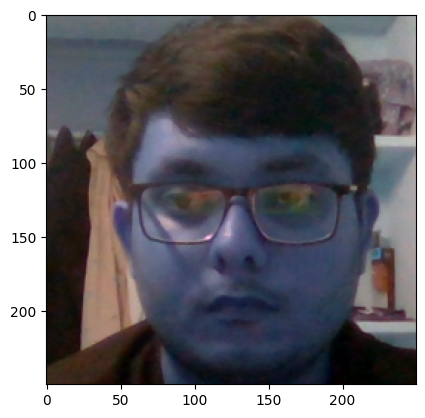

In [69]:
plt.imshow(frame[70:70+250,200:200+250,:])

In [72]:
#importing the uuid to generate the unique image name
import uuid

In [73]:
uuid.uuid1()

UUID('d1d2e01b-249a-11ed-b5cf-b05216746aa4')

In [18]:
anchor=tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive=tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative=tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [87]:
dir_test=anchor.as_numpy_iterator()

In [88]:
dir_test.next()

b'data\\anchor\\1bfbbe01-249c-11ed-8d9f-b05216746aa4.jpg'

In [89]:
ANC_PATH+'\*.jpg'

'data\\anchor\\*.jpg'

In [90]:
print(dir_test.next())

b'data\\anchor\\1badec18-249c-11ed-bb6c-b05216746aa4.jpg'


In [14]:
#Preprocessing
def preprocess(file_path):
    byte_img=tf.io.read_file(file_path)
    img=tf.io.decode_jpeg(byte_img)
    img=tf.image.resize(img,(100,100))
    img=img/255.0
    return img

In [15]:
img=preprocess(b'data\\anchor\\1badec18-249c-11ed-bb6c-b05216746aa4.jpg')

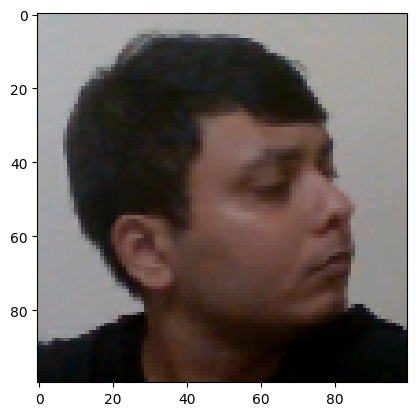

In [5]:
plt.imshow(img)

In [6]:
img.numpy().max()

0.7223039

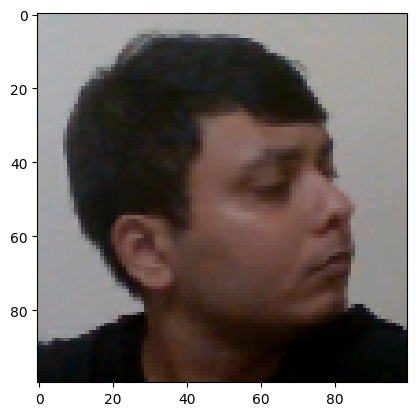

In [7]:
plt.imshow(img)

In [16]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

In [19]:
#CRAETING LABELLED DATASET,
positives=tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives=tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data=positives.concatenate(negatives)

In [23]:
data

<ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [101]:
tf.ones(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [102]:
data

<ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [24]:
(tf.zeros(len(anchor)))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [25]:
class_labels=tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))

In [26]:
iterator_labs=class_labels.as_numpy_iterator()

In [27]:
iterator_labs.next()

0.0

In [24]:
sample=data.as_numpy_iterator()

In [25]:
example=sample.next()

In [26]:
example

(b'data\\anchor\\56daca7e-249c-11ed-b643-b05216746aa4.jpg',
 b'data\\positive\\e9b53a02-249c-11ed-9764-b05216746aa4.jpg',
 1.0)

In [27]:
#LETS TRAIN OUR DATA NOW
def preprocess_twin(input_img,validation_img,label):
    return(preprocess(input_img),preprocess(validation_img),label)

In [28]:
res=preprocess_twin(*example)

In [119]:
len(res)

3

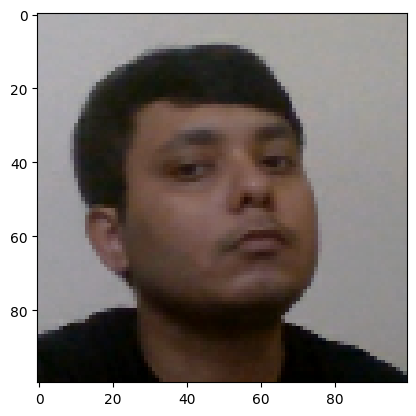

In [120]:
plt.imshow(res[1])

In [121]:
res[2]

1.0

In [29]:
data=data.map(preprocess_twin)
data=data.cache()
data=data.shuffle(buffer_size=1024)

In [123]:
sample=data.as_numpy_iterator()

In [124]:
sample.next()

(array([[[0.6960784 , 0.70392156, 0.7       ],
         [0.7029412 , 0.70906866, 0.69754905],
         [0.7019608 , 0.7       , 0.68921566],
         ...,
         [0.67745095, 0.67745095, 0.6460784 ],
         [0.6752451 , 0.6723039 , 0.6497549 ],
         [0.66593134, 0.6620098 , 0.64240193]],
 
        [[0.7080882 , 0.70441175, 0.71936274],
         [0.7014706 , 0.7       , 0.7022059 ],
         [0.6970588 , 0.6970588 , 0.6911765 ],
         ...,
         [0.6752451 , 0.6723039 , 0.6360294 ],
         [0.6781863 , 0.66862744, 0.6463235 ],
         [0.6698529 , 0.65416664, 0.64240193]],
 
        [[0.7078431 , 0.6960784 , 0.7254902 ],
         [0.6938726 , 0.69240195, 0.70098037],
         [0.6818628 , 0.6818628 , 0.67745095],
         ...,
         [0.6870098 , 0.6752451 , 0.64191175],
         [0.6848039 , 0.66862744, 0.6492647 ],
         [0.67941177, 0.6607843 , 0.6460784 ]],
 
        ...,
 
        [[0.00686275, 0.0129902 , 0.01470588],
         [0.01078431, 0.01495098, 0.01691

In [125]:
len(sample.next())

3

In [146]:
samp=sample.next()

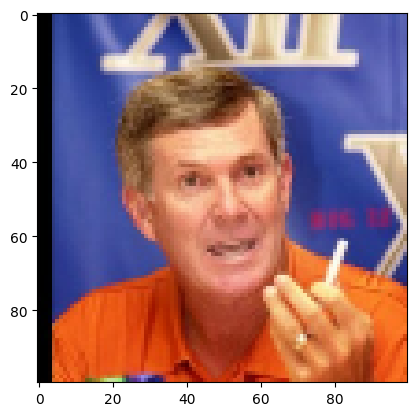

In [147]:
plt.imshow(samp[1])

In [131]:
samp[2]

1.0

In [48]:
#Training the data
train_data=data.take(round(len(data)*.7))
train_data=train_data.batch(16)
train_data=train_data.prefetch(8)

In [149]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [150]:
train_samples=train_data.as_numpy_iterator()

In [151]:
train_sample=train_samples.next()

In [152]:
len(train_sample[0]) 

16

In [156]:
round(len(data)*.3)

180

In [52]:
#Testing partition
test_data=data.skip(round(len(data)*.7))
test_data=test_data.take(round(len(data)*.3))
test_data=test_data.batch(16)
test_data=test_data.prefetch(8)

In [46]:
#BUILDING THE EMBEDDING LAYER
inp=Input(shape=(100,100,3),name='input_image')
inp

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_image')>

In [180]:
c1=Conv2D(64,(10,10),activation='relu')(inp)

In [181]:
m1=MaxPooling2D(64,(2,2),padding='same')(c1)

In [182]:
c2=Conv2D(128,(7,7),activation='relu')(m1)
m2=MaxPooling2D(64,(2,2),padding='same')(c2)

In [183]:
 c3=Conv2D(128,(4,4),activation='relu')(m2)
m3=MaxPooling2D(64,(2,2),padding='same')(c3)

In [184]:
c4=Conv2D(256,(4,4),activation='relu')(m3)

In [188]:
f1=Flatten()(c4)
d1=Dense(4096,activation='sigmoid')(f1)

In [33]:
import keras
from keras.layers import Activation, Dense 

In [32]:
def make_embedding():
    inp=Input(shape=(100,100,3),name='input_image')
    #first block
    c1=Conv2D(64,(10,10),activation='relu')(inp)
    m1=MaxPooling2D(64,(2,2),padding='same')(c1)
    #second block
    c2=Conv2D(128,(7,7),activation='relu')(m1)
    m2=MaxPooling2D(64,(2,2),padding='same')(c2)
    #Third block
    c3=Conv2D(128,(4,4),activation='relu')(m2)
    m3=MaxPooling2D(64,(2,2),padding='same')(c3)
    #Fourth Block
    c4=Conv2D(256,(4,4),activation='relu')(m3)
    f1=Flatten()(c4)
    d1=Dense(4096,activation='sigmoid')(f1)
    
    return Model(inputs=[inp],outputs=[d1],name='embedding')

In [34]:
embedding=make_embedding()

In [203]:
model.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 46, 46, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 20, 20, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 17, 17, 128)       26

In [42]:
#Building the distance layer Siamese L1
class L1Dist(Layer):
    def __init__(self,**kwargs):
        super().__init__()
        
    def call(self,input_embedding,validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [43]:
l1=L1Dist()

In [44]:
l1

In [48]:
#Making the Siamese Model
def make_siamese_model():
    #Handling the inputs/ Anchor image input in the network
    input_image=Input(name='input_img',shape=(100,100,3))
    #validation image in the network
    validation_image=Input(name='validation_img',shape=(100,100,3))
    siamese_layer=L1Dist()
    siamese_layer._name='distance'
    distances=siamese_layer(embedding(input_image),embedding(validation_image))
    classifier=Dense(1,activation='sigmoid')(distances)
    return Model(inputs=[input_image,validation_image],outputs=classifier,name='SiameseNetwork')

In [36]:
input_image=Input(name='input_img',shape=(100,100,3))
validation_image=Input(name='validation_img',shape=(100,100,3))

In [37]:
embedding(input_image)

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [39]:
inp_embedding=embedding(input_image)
val_embedding=embedding(validation_image)

In [212]:
inp_embedding

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [213]:
val_embedding

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [45]:
siamese_layer=L1Dist()

In [46]:
siamese_layer(inp_embedding,val_embedding)

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'l1_dist_1')>

In [49]:
#TRAINING
siamese_model=make_siamese_model()

In [219]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [221]:
#SETTING UP THE LOSS FUNCTION
binary_cross_loss=tf.losses.BinaryCrossentropy()

In [253]:
opt=tf.keras.optimizers.Adam(1e-4)
#0.0001

In [1]:
#CHECKPOINTS
checkpoint_dir='./training_checkpoints'
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')
checkpoint=tf.train.Checkpoint(opt=opt,siamese_model=siamese_model)

NameError: name 'os' is not defined

In [254]:
#Building the training step function
@tf.function
def train_step(batch):
    with tf.GradientTape() as tape:
        X=batch[:2]
        y=batch[2]
        #Forward pass
        yhat=siamese_model(X,training=True)
        #calculating loss
        loss=binary_cross_loss(y,yhat)
    print(loss)
    grad=tape.gradient(loss,siamese_model.trainable_variables)
    opt.apply_gradients(zip(grad,siamese_model.trainable_variables))
    return loss

In [49]:
test_batch=train_data.as_numpy_iterator()

In [228]:
batch_1=test_batch.next()

In [229]:
len(batch_1[0])

16

In [230]:
batch_1[2]

array([1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
      dtype=float32)

In [255]:
def train(data,EPOCHS):
    for epoch in range(1,EPOCHS+1):
        print('\n Epoch{}/{}'.format(epoch,EPOCHS))
        progbar=tf.keras.utils.Progbar(len(data))
        
        for idx,batch in enumerate(data):
            train_step(batch)
            progbar.update(idx+1)
        #save checkpoints
        if epoch %10==0:
            checkpoint.save(file_prefix=checkpoint_prefix) 

In [235]:
EPOCHS=50

In [256]:
train(train_data,EPOCHS)


 Epoch1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 1541s 57s/step

 Epoch2/50
27/27 [==============================] - 1520s 56s/step

 Epoch3/50
27/27 [==============================] - 1516s 56s/step

 Epoch4/50
27/27 [==============================] - 1534s 57s/step

 Epoch5/50
27/27 [==============================] - 1505s 56s/step

 Epoch6/50
27/27 [==============================] - 1505s 56s/step

 Epoch7/50
27/27 [==============================] - 1509s 56s/step

 Epoch8/50
27/27 [==============================] - 1502s 56s/step

 Epoch9/50
27/27 [==============================] - 1524s 56s/step

 Epoch10/50
27/27 [==============================] - 1505s 56s/step

 Epoch11/50
27/27 [==============================] - 25252s 969s/step

 Epoch12/50
27/27 [==============================] - 1760s 65s/step

 Epoch13/50
27/27 [=====

In [257]:
from tensorflow.keras.metrics import Precision, Recall

In [53]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [54]:
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 7s 7s/step


array([[0.49992147],
       [0.4995716 ],
       [0.49987328],
       [0.49970362],
       [0.4984154 ],
       [0.50023407],
       [0.49972004],
       [0.4997566 ],
       [0.499702  ],
       [0.5000531 ],
       [0.50002533],
       [0.49867547],
       [0.49968532],
       [0.49950927],
       [0.49955928],
       [0.4997122 ]], dtype=float32)

In [260]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]

In [261]:
y_true

array([1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.],
      dtype=float32)

In [262]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [263]:
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

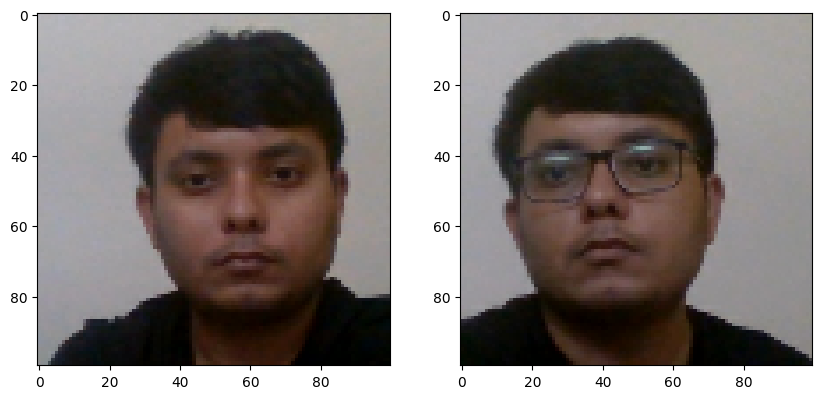

In [264]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [265]:
# Save weights
siamese_model.save('siamesemodel.h5')

In [10]:
L1Dist

__main__.L1Dist

In [56]:
## Reload model 
model = tf.keras.models.load_model('siamesemodel.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [57]:
model.predict([test_input, test_val])

1/1 [==============================] - 6s 6s/step


array([[9.9995148e-01],
       [3.9427439e-09],
       [9.9910945e-01],
       [1.0000000e+00],
       [6.6131656e-07],
       [2.8177592e-06],
       [1.7754348e-07],
       [1.0000000e+00],
       [1.6024535e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.4278833e-08],
       [1.9696925e-07],
       [1.0000000e+00],
       [9.9996811e-01],
       [4.7731348e-08]], dtype=float32)

In [21]:
# View model summary
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [22]:
os.listdir(os.path.join('application_data', 'verification_images'))

['12ecd6ad-249d-11ed-bab6-b05216746aa4.jpg',
 '12fb2e91-249d-11ed-935c-b05216746aa4.jpg',
 '13a3ca89-249d-11ed-863b-b05216746aa4.jpg',
 '13a85e82-249d-11ed-acce-b05216746aa4.jpg',
 '13b6b666-249d-11ed-9e33-b05216746aa4.jpg',
 '13c55c7d-249d-11ed-81d2-b05216746aa4.jpg',
 '13d64c44-249d-11ed-b075-b05216746aa4.jpg',
 '13e0104d-249d-11ed-b231-b05216746aa4.jpg',
 '13ee683f-249d-11ed-98ba-b05216746aa4.jpg',
 '13fa9d43-249d-11ed-b89d-b05216746aa4.jpg',
 '14a471d8-249d-11ed-bbb7-b05216746aa4.jpg',
 '14b2c9a7-249d-11ed-b7b2-b05216746aa4.jpg',
 '14ba1c9d-249d-11ed-be51-b05216746aa4.jpg',
 '14c89bc6-249d-11ed-8e4d-b05216746aa4.jpg',
 '14d71a86-249d-11ed-a9d0-b05216746aa4.jpg',
 '14ed138b-249d-11ed-b0a2-b05216746aa4.jpg',
 '14fb6b8c-249d-11ed-986d-b05216746aa4.jpg',
 '15a52db1-249d-11ed-ba06-b05216746aa4.jpg',
 '15b13bbb-249d-11ed-a27c-b05216746aa4.jpg',
 '1cc584b6-249d-11ed-a365-b05216746aa4.jpg',
 '1cd3dd10-249d-11ed-a632-b05216746aa4.jpg',
 '1ce9aecb-249d-11ed-997a-b05216746aa4.jpg',
 '1cf854bc

In [23]:
os.path.join('application_data', 'input_images', 'input_image.jpg')


'application_data\\input_images\\input_image.jpg'

In [24]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\12ecd6ad-249d-11ed-bab6-b05216746aa4.jpg
application_data\verification_images\12fb2e91-249d-11ed-935c-b05216746aa4.jpg
application_data\verification_images\13a3ca89-249d-11ed-863b-b05216746aa4.jpg
application_data\verification_images\13a85e82-249d-11ed-acce-b05216746aa4.jpg
application_data\verification_images\13b6b666-249d-11ed-9e33-b05216746aa4.jpg
application_data\verification_images\13c55c7d-249d-11ed-81d2-b05216746aa4.jpg
application_data\verification_images\13d64c44-249d-11ed-b075-b05216746aa4.jpg
application_data\verification_images\13e0104d-249d-11ed-b231-b05216746aa4.jpg
application_data\verification_images\13ee683f-249d-11ed-98ba-b05216746aa4.jpg
application_data\verification_images\13fa9d43-249d-11ed-b89d-b05216746aa4.jpg
application_data\verification_images\14a471d8-249d-11ed-bbb7-b05216746aa4.jpg
application_data\verification_images\14b2c9a7-249d-11ed-b7b2-b05216746aa4.jpg
application_data\verification_images\14ba1c9d-249d-11ed-be51-b05

In [25]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_images', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [275]:
#OPENCV REAL TIME VERIFICATION

In [34]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_images', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 1s 571ms/step
False


In [11]:
img=preprocess(os.path.join('application_data', 'input_images', 'input_image.jpg'))

In [12]:
img

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.654902  , 0.64705884, 0.6666667 ],
        [0.6502451 , 0.64240193, 0.6620098 ],
        [0.65392154, 0.6372549 , 0.65392154],
        ...,
        [0.5715686 , 0.5637255 , 0.56764704],
        [0.5732843 , 0.56911767, 0.5620098 ],
        [0.57254905, 0.5686275 , 0.5529412 ]],

       [[0.6490196 , 0.64215684, 0.6617647 ],
        [0.6482843 , 0.64240193, 0.657598  ],
        [0.64387256, 0.6379902 , 0.6487745 ],
        ...,
        [0.5708333 , 0.56691176, 0.5590686 ],
        [0.5740196 , 0.56789213, 0.55490196],
        [0.5747549 , 0.56789213, 0.5531863 ]],

       [[0.6401961 , 0.6392157 , 0.65      ],
        [0.6387255 , 0.6394608 , 0.64730394],
        [0.6372549 , 0.6401961 , 0.6480392 ],
        ...,
        [0.5656863 , 0.5647059 , 0.5568628 ],
        [0.5754902 , 0.57009804, 0.5615196 ],
        [0.5754902 , 0.5686275 , 0.5598039 ]],

       ...,

       [[0.4882353 , 0.39509803, 0.3392157 ],
        [0.49

In [27]:
results

[array([[0.99999946]], dtype=float32),
 array([[0.9999996]], dtype=float32),
 array([[0.9999994]], dtype=float32),
 array([[0.99999946]], dtype=float32),
 array([[0.9999995]], dtype=float32),
 array([[0.99999917]], dtype=float32),
 array([[0.9999981]], dtype=float32),
 array([[0.9999988]], dtype=float32),
 array([[0.9999988]], dtype=float32),
 array([[0.99999976]], dtype=float32),
 array([[0.9999999]], dtype=float32),
 array([[0.9999999]], dtype=float32),
 array([[0.99999994]], dtype=float32),
 array([[0.99999976]], dtype=float32),
 array([[0.9999999]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.9999988]], dtype=float32),
 array([[0.9900875]], dtype=float32),
 array([[0.9931094]], dtype=float32),
 array([[0.99999976]], dtype=float32),
 array([[0.9999795]], dtype=float32),
 array([[0.99997765]], dtype=float32),
 array([[0.99993396]], dtype=float32),
 array([[0.9972606]], dtype=float32),
 array([[0.99946654]], dtype=float32),
 array([[0.9890904]], dtype=float32),
 array([[

In [32]:
np.sum(np.squeeze(results)>0.9)

106